# Imports and reading data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('west_nile/west_nile/input/train.csv')

In [3]:
spray_df = pd.read_csv('west_nile/west_nile/input/spray.csv')

In [4]:
weather_df = pd.read_csv('west_nile/west_nile/input/weather.csv')

# Train Cleaning: 

## Total mosquitos per trap:

In [5]:
cols = [col for col in df.columns if col not in ['NumMosquitos', 'WnvPresent']]
df = df.groupby(cols, as_index=False).sum()
df['WnvPresent'] = (df.WnvPresent>0).astype(int)

In [6]:
df[['Trap', 'Date', 'Species']].duplicated(keep=False).sum()

0

# Spray Cleaning:

##  Splitting Date into year/month/day:

In [7]:
spray_df['year'] = spray_df.Date.str[:4]
spray_df['month'] = spray_df.Date.str[5:7]
spray_df['day'] = spray_df.Date.str[-2:]

# EDA:

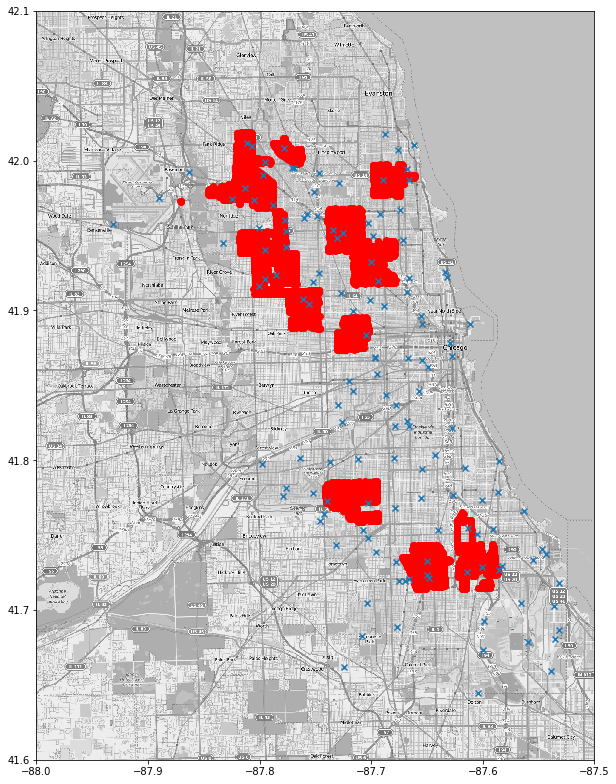

In [8]:

mapdata = np.loadtxt("west_nile/west_nile/input/mapdata_copyright_openstreetmap_contributors.txt")
traps = df[['Date', 'Trap','Longitude', 'Latitude', 'WnvPresent']]

aspect = mapdata.shape[0] * 1.0 / mapdata.shape[1]
lon_lat_box = (-88, -87.5, 41.6, 42.1)

plt.figure(figsize=(10,14))
plt.imshow(mapdata,
          cmap=plt.get_cmap('gray'),
          extent=lon_lat_box,
          aspect=aspect)

spray_df = spray_df[spray_df['Longitude']>-88]
locations = traps[['Longitude', 'Latitude']].drop_duplicates().values
sprays = spray_df[['Longitude', 'Latitude']].drop_duplicates().values
plt.scatter(sprays[:,0], sprays[:,1], c='r', alpha=1)
plt.scatter(locations[:,0], locations[:,1], marker='x')


In this plot, each x represents a trap location, and the red marks are areas sprayed.  
___

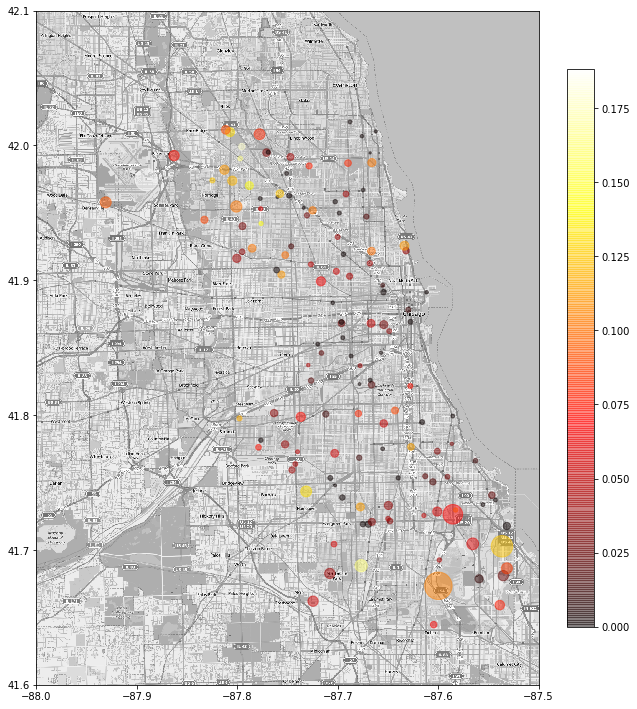

In [9]:
dfll = df.groupby(['Latitude', 'Longitude'],as_index=False).mean().copy()
traps = df[['Date', 'Trap','Longitude', 'Latitude', 'WnvPresent']]

aspect = mapdata.shape[0] * 1.0 / mapdata.shape[1]
lon_lat_box = (-88, -87.5, 41.6, 42.1)

plt.figure(figsize=(10,14))
plt.imshow(mapdata,
          cmap=plt.get_cmap('gray'),
          extent=lon_lat_box,
          aspect=aspect)

locations = traps[['Longitude', 'Latitude']].drop_duplicates().values
#plt.scatter(locations[:,0], locations[:,1], marker='x')
plt.scatter(dfll['Longitude'], dfll['Latitude'], c=dfll.WnvPresent, s=5*dfll.NumMosquitos, 
            marker='o',alpha=0.5, cmap='hot')
plt.colorbar(fraction=0.05)

#plt.scatter(df['Longitude'], df['Latitude'], c=df.WnvPresent, marker='x',)

In this plot, each bubble represents a mosquito trap.  The size represents
the total number of mosquitos caught by the trap, and the color represents
the percentage of the time the trap caught mosquitos with West Nile Virus.
___

In [10]:
trap_df = df[df.Trap == 'T900']
wnvDates = trap_df[trap_df.WnvPresent ==1]['Date']

Text(0.5,1,'WNV+ Mosquitos found at red lines')

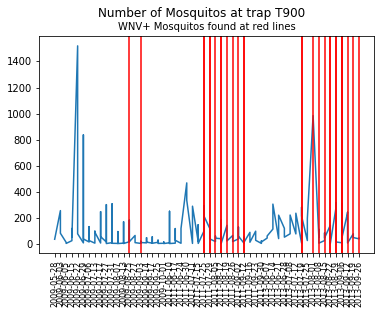

In [21]:
plt.plot(trap_df.Date, trap_df.NumMosquitos)
for d in wnvDates:
    plt.axvline(d, ymax=1500, c='r')
plt.xticks(rotation='vertical', fontsize=8);
plt.suptitle('Number of Mosquitos at trap T900')
plt.title('WNV+ Mosquitos found at red lines', fontsize=10)

This is the total population of mosquitos at
trap T900 in blue and instances where wnv was
found to be present in red.

#### We need to split this by year
___


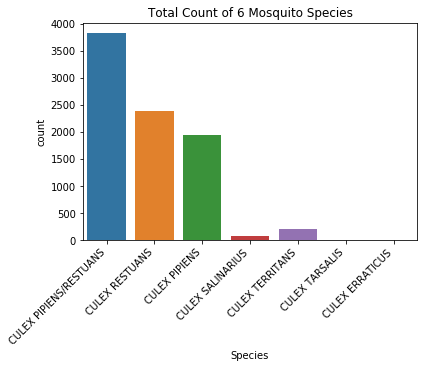

In [12]:
sns.countplot(x='Species', data=df)
plt.title("Total Count of 6 Mosquito Species")
plt.xticks(rotation=45, ha='right');

In [13]:
df[df['WnvPresent'] == 1]

,Date,Address,Species,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy,NumMosquitos,WnvPresent
464,2007-07-18,"3800 East 115th Street, Chicago, IL 60617, USA",CULEX PIPIENS/RESTUANS,38,E 115TH ST,T215,"3800 E 115TH ST, Chicago, IL",41.686398,-87.531635,8,63,1
569,2007-07-25,"South Doty Avenue, Chicago, IL, USA",CULEX PIPIENS,12,S DOTY AVE,T115,"1200 S DOTY AVE, Chicago, IL",41.673408,-87.599862,5,2356,1
570,2007-07-25,"South Doty Avenue, Chicago, IL, USA",CULEX PIPIENS/RESTUANS,12,S DOTY AVE,T115,"1200 S DOTY AVE, Chicago, IL",41.673408,-87.599862,5,644,1
710,2007-08-01,"2200 West 113th Street, Chicago, IL 60643, USA",CULEX PIPIENS/RESTUANS,22,W 113TH ST,T086,"2200 W 113TH ST, Chicago, IL",41.688324,-87.676709,8,223,1
718,2007-08-01,"2200 West 89th Street, Chicago, IL 60643, USA",CULEX PIPIENS,22,W 89TH ST,T096,"2200 W 89TH ST, Chicago, IL",41.731922,-87.677512,8,17,1
740,2007-08-01,"3300 North Rutherford Avenue, Chicago, IL 6063...",CULEX PIPIENS,33,N RUTHERFORD AVE,T144,"3300 N RUTHERFORD AVE, Chicago, IL",41.940160,-87.794896,9,11,1
769,2007-08-01,"4000 South Dearborn Street, Chicago, IL 60609,...",CULEX PIPIENS/RESTUANS,40,S DEARBORN ST,T081,"4000 S DEARBORN ST, Chicago, IL",41.821582,-87.627796,9,20,1
772,2007-08-01,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS/RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,104,1
777,2007-08-01,"4200 West 127th Street, Alsip, IL 60803, USA",CULEX PIPIENS,42,W 127TH PL,T135,"4200 W 127TH PL, Chicago, IL",41.662014,-87.724608,8,67,1
778,2007-08-01,"4200 West 127th Street, Alsip, IL 60803, USA",CULEX PIPIENS/RESTUANS,42,W 127TH PL,T135,"4200 W 127TH PL, Chicago, IL",41.662014,-87.724608,8,89,1


In [14]:
df[df['WnvPresent'] == 1]

,Date,Address,Species,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy,NumMosquitos,WnvPresent
464,2007-07-18,"3800 East 115th Street, Chicago, IL 60617, USA",CULEX PIPIENS/RESTUANS,38,E 115TH ST,T215,"3800 E 115TH ST, Chicago, IL",41.686398,-87.531635,8,63,1
569,2007-07-25,"South Doty Avenue, Chicago, IL, USA",CULEX PIPIENS,12,S DOTY AVE,T115,"1200 S DOTY AVE, Chicago, IL",41.673408,-87.599862,5,2356,1
570,2007-07-25,"South Doty Avenue, Chicago, IL, USA",CULEX PIPIENS/RESTUANS,12,S DOTY AVE,T115,"1200 S DOTY AVE, Chicago, IL",41.673408,-87.599862,5,644,1
710,2007-08-01,"2200 West 113th Street, Chicago, IL 60643, USA",CULEX PIPIENS/RESTUANS,22,W 113TH ST,T086,"2200 W 113TH ST, Chicago, IL",41.688324,-87.676709,8,223,1
718,2007-08-01,"2200 West 89th Street, Chicago, IL 60643, USA",CULEX PIPIENS,22,W 89TH ST,T096,"2200 W 89TH ST, Chicago, IL",41.731922,-87.677512,8,17,1
740,2007-08-01,"3300 North Rutherford Avenue, Chicago, IL 6063...",CULEX PIPIENS,33,N RUTHERFORD AVE,T144,"3300 N RUTHERFORD AVE, Chicago, IL",41.940160,-87.794896,9,11,1
769,2007-08-01,"4000 South Dearborn Street, Chicago, IL 60609,...",CULEX PIPIENS/RESTUANS,40,S DEARBORN ST,T081,"4000 S DEARBORN ST, Chicago, IL",41.821582,-87.627796,9,20,1
772,2007-08-01,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS/RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,104,1
777,2007-08-01,"4200 West 127th Street, Alsip, IL 60803, USA",CULEX PIPIENS,42,W 127TH PL,T135,"4200 W 127TH PL, Chicago, IL",41.662014,-87.724608,8,67,1
778,2007-08-01,"4200 West 127th Street, Alsip, IL 60803, USA",CULEX PIPIENS/RESTUANS,42,W 127TH PL,T135,"4200 W 127TH PL, Chicago, IL",41.662014,-87.724608,8,89,1


In [15]:
df[df['Species'] == 'CULEX PIPIENS']

,Date,Address,Species,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy,NumMosquitos,WnvPresent
12,2007-05-29,"2200 West 89th Street, Chicago, IL 60643, USA",CULEX PIPIENS,22,W 89TH ST,T096,"2200 W 89TH ST, Chicago, IL",41.731922,-87.677512,8,1,0
25,2007-06-05,"1100 Roosevelt Road, Chicago, IL 60608, USA",CULEX PIPIENS,11,W ROOSEVELT,T048,"1100 W ROOSEVELT, Chicago, IL",41.867108,-87.654224,8,2,0
33,2007-06-05,"1500 West Webster Avenue, Chicago, IL 60614, USA",CULEX PIPIENS,15,W WEBSTER AVE,T045,"1500 W WEBSTER AVE, Chicago, IL",41.921600,-87.666455,8,1,0
43,2007-06-05,"2200 West 89th Street, Chicago, IL 60643, USA",CULEX PIPIENS,22,W 89TH ST,T096,"2200 W 89TH ST, Chicago, IL",41.731922,-87.677512,8,1,0
57,2007-06-05,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,1,0
62,2007-06-05,"4200 West 127th Street, Alsip, IL 60803, USA",CULEX PIPIENS,42,W 127TH PL,T135,"4200 W 127TH PL, Chicago, IL",41.662014,-87.724608,8,1,0
85,2007-06-26,"1000 South California Avenue, Chicago, IL 6061...",CULEX PIPIENS,10,S CALIFORNIA AVE,T088,"1000 S CALIFORNIA AVE, Chicago, IL",41.869107,-87.696293,9,1,0
120,2007-06-26,"4200 West 127th Street, Alsip, IL 60803, USA",CULEX PIPIENS,42,W 127TH PL,T135,"4200 W 127TH PL, Chicago, IL",41.662014,-87.724608,8,6,0
151,2007-06-26,"University of Illinois at Chicago, 1100 South ...",CULEX PIPIENS,11,S ASHLAND AVE,T090,"1100 S ASHLAND AVE, Chicago, IL",41.868077,-87.666901,9,1,0
156,2007-06-29,"1000 West 95th Street, Chicago, IL 60643, USA",CULEX PIPIENS,10,W 95TH ST,T085,"1000 W 95TH ST, Chicago, IL",41.721474,-87.648064,8,1,0


In [16]:
weather_df.head()

,Station,Date,Tmax,Tmin,Tavg,Depart,DewPoint,WetBulb,Heat,Cool,...,CodeSum,Depth,Water1,SnowFall,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed
0,1,2007-05-01,83,50,67,14,51,56,0,2,...,,0,M,0.0,0.00,29.10,29.82,1.7,27,9.2
1,2,2007-05-01,84,52,68,M,51,57,0,3,...,,M,M,M,0.00,29.18,29.82,2.7,25,9.6
2,1,2007-05-02,59,42,51,-3,42,47,14,0,...,BR,0,M,0.0,0.00,29.38,30.09,13.0,4,13.4
3,2,2007-05-02,60,43,52,M,42,47,13,0,...,BR HZ,M,M,M,0.00,29.44,30.08,13.3,2,13.4
4,1,2007-05-03,66,46,56,2,40,48,9,0,...,,0,M,0.0,0.00,29.39,30.12,11.7,7,11.9


In [17]:
weather_df['CodeSum'].value_counts()

                         1609
RA                        296
RA BR                     238
BR                        110
TSRA RA BR                 92
BR HZ                      81
RA DZ BR                   65
TSRA RA                    43
HZ                         39
RA BR HZ                   38
TSRA                       34
RA DZ                      22
TSRA BR                    21
TS TSRA RA BR              19
RA HZ                      16
TS RA                      13
TSRA RA BR HZ              12
TS                         10
DZ BR                      10
TS TSRA BR                 10
DZ BR HZ                    9
TS RA BR                    8
TSRA BR HZ                  8
DZ                          8
TS TSRA BR HZ               7
RA DZ BR HZ                 7
TS TSRA RA                  7
TS TSRA                     7
TSRA HZ                     4
TSRA RA BR VCTS             4
                         ... 
FG+ FG BR                   1
TS TSRA GR RA BR            1
RA DZ SN  